# Medical Personal  Cost
Predicting the medical charge  with the help of the features that are related to the patient

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# getting the data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# converting all the data into numbers
insurance_data = pd.get_dummies(insurance)
insurance_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [4]:
insurance_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
# dividing into dependant variables(labels) and independant variables(features)
X = insurance_data.drop("charges",axis = 1)
y = insurance_data["charges"]

In [6]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
# build a neural network 
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [11]),
    tf.keras.layers.Dense(1)
])

# compile model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(lr = 0.1),
                        metrics = tf.keras.losses.mae)

# fit the model
history = insurance_model.fit(X_train, y_train, epochs = 100, verbose = 0)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# summary of the model
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


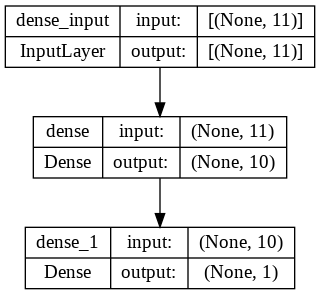

In [11]:
# neural network structure
from keras.utils import plot_model
plot_model(insurance_model,show_shapes = True)

In [12]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3163.6011 - mean_absolute_error: 3163.6011


[3163.60107421875, 3163.60107421875]

In [13]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


Text(0.5, 0, 'epochs')

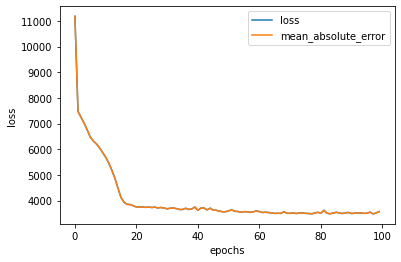

In [14]:
# plotting the learing rate
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# feature scaling
1. scale(normalisation) - converts all values to between 0 and 1 whilst preserving the original distribution - MinMaxScaler - use as default with neural networks.
2. standardization - removes the mean and divides each value by the standard deviation - StandardScaler - transform a feature to have close to normal distribution(this reduces the effect of outliers)

In [15]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex","smoker","region"])
)

# create x and y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# build our train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ct.fit(X_train)
X_train_1 = ct.transform(X_train)
X_test_1 = ct.transform(X_test)

In [17]:
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                          metrics = tf.keras.losses.mae)

history = insurance_model_1.fit(X_train_1,y_train,epochs = 100, verbose = 0)

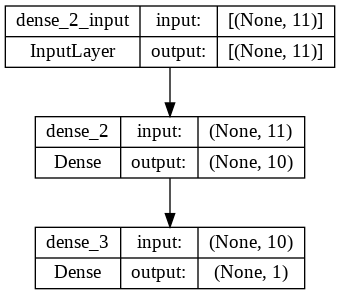

In [18]:
plot_model(insurance_model_1, show_shapes = True)

In [19]:
insurance_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                120       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


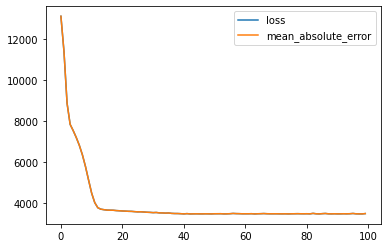

In [20]:
pd.DataFrame(history.history).plot()

In [21]:
insurance_model_1.evaluate(X_test_1, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3155.8208 - mean_absolute_error: 3155.8208


[3155.82080078125, 3155.82080078125]

In [22]:
# to predict the individual data
firstdata = X_test_1[0][None,...]
firstdata.shape

(1, 11)

In [23]:
insurance_model_1.predict(firstdata)

1/1 [==============================] - 0s 196ms/step


array([[9230.31]], dtype=float32)

**important**: [None,...] method is used for predicting the individual data